# 3-6. 바람장

## 3-6-1. 벡터(Vector) 그림

In [1]:
import numpy as np
import matplotlib.pyplot as plt

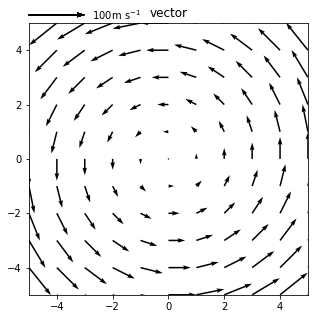

In [2]:
x = np.arange(-5,5+1,1)
y = np.arange(-5,5+1,1)
x2d, y2d = np.meshgrid(x,y)
theta = np.arctan2(y2d, x2d)
#np.arctan() = 출력범위가 [-pi/2, pi/2]
#180도 이상 차이나는 각의 arctan 값은 구분이 안됨. (ex : arctan(0)=arctan(180))
#여기서 쓴 arctan2 = 출력범위가 [-pi, pi]
#numpy.acrtan2(x1, x2, arg)
#x1array_like, real-valued | y-coordinates
#x2array_like, real_valued | x coordiatnes
r= np.sqrt(x2d**2+y2d**2)
#원의 방정식 | x2 + y2 = r2 에 루트 씌운 것

scale = 10
u = -r*np.sin(theta)*scale
v = r*np.cos(theta)*scale
#scale 없으면 화살표가 너무 작아서 안보임.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
Q = plt.quiver(x,y,u,v, units= 'xy', scale_units = 'xy', scale = 50)
quiverkey = ax.quiverkey(Q,X=0.2,Y=1.03,U=100, label = "100m s$^{-1}$", labelpos = "E")
#title 없으니까 책대로 하면 범위 벗어나서 key가 안보임..
#title을 만들어서 윗공간 확보후 이대로 설정하면 됨
#원래 quiverkey의 X, Y location은 (0,0) : lower left (1,1) : upper right 

plt.subplots_adjust(hspace=0.235)
plt.axis([-5,5,-5,5])
ax.set_title("vector")

filename_figure = "vector_example.png"
plt.savefig(filename_figure)

## 3-6-2. 유선도(Streamline) 그리기

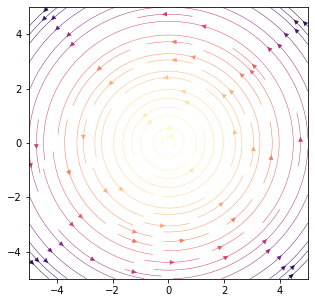

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5+1,1)
y = np.arange(-5,5+1,1)
x2d, y2d = np.meshgrid(x,y)
theta = np.arctan2(y2d, x2d)
r = np.sqrt(x2d**2 + y2d**2)

scale=10
u = -r*np.sin(theta)*scale
v = r*np.cos(theta)*scale

fig = plt.figure(figsize=(5,5))
plt.streamplot(x,y,u,v, color = r**2, linewidth=0.5, cmap = 'magma_r')
plt.axis([-5,5,-5,5])

filename_figure = "streamline_example.png"
plt.savefig(filename_figure)

## 3-6-3. 바람깃(Wind barb) 그림

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

(11, 11)


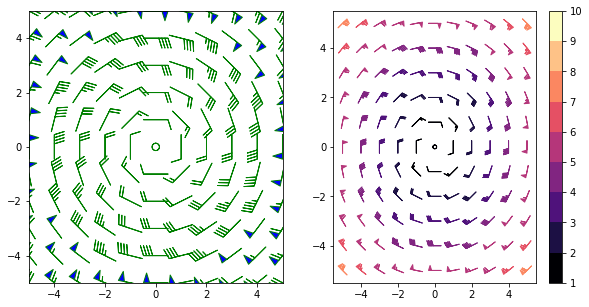

In [21]:
x = np.arange(-5,5+1,1)
y = np.arange(-5,5+1,1)

x2d, y2d = np.meshgrid(x,y)
theta = np.arctan2(y2d, x2d)
r = np.sqrt(x2d**2 + y2d**2)
print(r.shape)

scale=10
u = -r*np.sin(theta)*scale
v = r*np.cos(theta)*scale

fig = plt.figure(figsize=(10,5))

fig.add_subplot(1,2,1)
plt.barbs(x,y,u,v, pivot = 'middle', barbcolor = 'g', flagcolor='b')
plt.axis([-5,5,-5,5])

fig.add_subplot(1,2,2)
#cmap = plt.cm.magma
ax2 = plt.barbs(x,y,u,v,r,length = 5, pivot = 'middle', cmap='magma', norm = BoundaryNorm(np.linspace(1,10,10), ncolors = 256))
#BoundaryNorm(boundaries, ncolors, clip = False) 
#boundaries : Monotonically increasing sequence of boundaries
#ncolors : Number of colors in the colormap to be used. 
#여기서의 의미 : (1~10) 범위를 256개의 색을 사용해서 나타내겠다.
plt.colorbar(ax2)
#r 은 ' C'에 해당함. An optional array used to map colors to the barbs.

In [11]:
norm = BoundaryNorm(np.linspace(1,10,10), ncolors = 256)
norm